In [87]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import font_manager as fm
import matplotlib
import scipy.stats as st
from scipy.stats import linregress
import seaborn as sns; sns.set();
from sklearn import datasets

import requests
import gmaps
import os

# Import API key
from gkey import gkey


## Read CSV

In [2]:
licenses = "Resources/business-licenses.csv"
owners = "Resources/business-owners.csv"

In [3]:
license_df = pd.read_csv(licenses)
license_df.head()

C:\Users\junya\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,ID,LICENSE ID,ACCOUNT NUMBER,SITE NUMBER,LEGAL NAME,DOING BUSINESS AS NAME,ADDRESS,CITY,STATE,ZIP CODE,...,LICENSE STATUS CHANGE DATE,SSA,LATITUDE,LONGITUDE,LOCATION,Community Areas,Historical Wards 2003-2015,Zip Codes,Census Tracts,Wards
0,101-20040516,1480073,1,1,BERGHOFF RESTAURANT COMPANY OF DELAWARE,BERGHOFF'S RESTAURANT,17 W ADAMS ST # 1ST,CHICAGO,IL,60603,...,NaN,1.0,41.879342,-87.628412,"{'latitude': '41.879341938770445', 'longitude'...",38.0,22.0,14912.0,92.0,36.0
1,101-20021116,1278029,1,1,BERGHOFF RESTAURANT COMPANY OF DELAWARE,BERGHOFF'S RESTAURANT,17 W ADAMS ST # 1ST,CHICAGO,IL,60603,...,NaN,1.0,41.879342,-87.628412,"{'latitude': '41.879341938770445', 'longitude'...",38.0,22.0,14912.0,92.0,36.0
2,101-20030516,1337924,1,1,BERGHOFF RESTAURANT COMPANY OF DELAWARE,BERGHOFF'S RESTAURANT,17 W ADAMS ST # 1ST,CHICAGO,IL,60603,...,NaN,1.0,41.879342,-87.628412,"{'latitude': '41.879341938770445', 'longitude'...",38.0,22.0,14912.0,92.0,36.0
3,100-20040516,1480076,1,1,BERGHOFF RESTAURANT COMPANY OF DELAWARE,BERGHOFF'S RESTAURANT,17 W ADAMS ST # 1ST,CHICAGO,IL,60603,...,NaN,1.0,41.879342,-87.628412,"{'latitude': '41.879341938770445', 'longitude'...",38.0,22.0,14912.0,92.0,36.0
4,101-20031116,1404362,1,1,BERGHOFF RESTAURANT COMPANY OF DELAWARE,BERGHOFF'S RESTAURANT,17 W ADAMS ST # 1ST,CHICAGO,IL,60603,...,NaN,1.0,41.879342,-87.628412,"{'latitude': '41.879341938770445', 'longitude'...",38.0,22.0,14912.0,92.0,36.0


#### 1. Which company has the most number of business in Chicago

In [9]:
license_1 = license_df[['ID', 'LICENSE ID', 'ACCOUNT NUMBER', 'SITE NUMBER', 'LEGAL NAME', 'DOING BUSINESS AS NAME', 'ADDRESS']]

In [10]:
license_1.head()

,ID,LICENSE ID,ACCOUNT NUMBER,SITE NUMBER,LEGAL NAME,DOING BUSINESS AS NAME,ADDRESS
0,101-20040516,1480073,1,1,BERGHOFF RESTAURANT COMPANY OF DELAWARE,BERGHOFF'S RESTAURANT,17 W ADAMS ST # 1ST
1,101-20021116,1278029,1,1,BERGHOFF RESTAURANT COMPANY OF DELAWARE,BERGHOFF'S RESTAURANT,17 W ADAMS ST # 1ST
2,101-20030516,1337924,1,1,BERGHOFF RESTAURANT COMPANY OF DELAWARE,BERGHOFF'S RESTAURANT,17 W ADAMS ST # 1ST
3,100-20040516,1480076,1,1,BERGHOFF RESTAURANT COMPANY OF DELAWARE,BERGHOFF'S RESTAURANT,17 W ADAMS ST # 1ST
4,101-20031116,1404362,1,1,BERGHOFF RESTAURANT COMPANY OF DELAWARE,BERGHOFF'S RESTAURANT,17 W ADAMS ST # 1ST


In [12]:
license_1['ACCOUNT NUMBER'].max()

464863

In [13]:
license_1['SITE NUMBER'].max()

532

In [19]:
license_1.groupby('LEGAL NAME').count().sort_values(["ID"], ascending=False)

,ID,LICENSE ID,ACCOUNT NUMBER,SITE NUMBER,DOING BUSINESS AS NAME,ADDRESS
LEGAL NAME,,,,,,
WALGREEN CO.,2801,2801,2801,2801,2801,2801
"BOND DRUG COMPANY OF ILLINOIS, LLC",2393,2393,2393,2393,2393,2393
SP PLUS CORPORATION,2240,2240,2240,2240,2240,2240
STARBUCKS CORPORATION,2133,2133,2133,2133,2133,2133
AMERICAN DRUG STORES LLC,1889,1889,1889,1889,1889,1889
...,...,...,...,...,...,...
KEYS TRANSPORTATION,1,1,1,1,1,1
KEYON M. GASKIN,1,1,1,1,1,1
KEYNO CHATEAU SMALL,1,1,1,1,1,1


In [20]:
license_1.groupby('DOING BUSINESS AS NAME').count().sort_values(["ID"], ascending=False)

,ID,LICENSE ID,ACCOUNT NUMBER,SITE NUMBER,LEGAL NAME,ADDRESS
DOING BUSINESS AS NAME,,,,,,
7-ELEVEN,1636,1636,1636,1636,1636,1636
SUBWAY,1544,1544,1544,1544,1544,1544
DUNKIN DONUTS,1111,1111,1111,1111,1111,1111
ALLIED WASTE OF CHICAGO,967,967,967,967,967,967
JACKSON HEWITT TAX SERVICE,904,904,904,904,904,904
...,...,...,...,...,...,...
DYNASTY FITNESS CENTER,1,1,1,1,1,1
REAL ESTATE SERVICES,1,1,1,1,1,1
REAL GOOD FOOD & CATERING,1,1,1,1,1,1


#### 3. Application type distribution

In [4]:
for i in license_df.columns:
    print(i)

ID
LICENSE ID
ACCOUNT NUMBER
SITE NUMBER
LEGAL NAME
DOING BUSINESS AS NAME
ADDRESS
CITY
STATE
ZIP CODE
WARD
PRECINCT
WARD PRECINCT
POLICE DISTRICT
LICENSE CODE
LICENSE DESCRIPTION
BUSINESS ACTIVITY ID
BUSINESS ACTIVITY
LICENSE NUMBER
APPLICATION TYPE
APPLICATION CREATED DATE
APPLICATION REQUIREMENTS COMPLETE
PAYMENT DATE
CONDITIONAL APPROVAL
LICENSE TERM START DATE
LICENSE TERM EXPIRATION DATE
LICENSE APPROVED FOR ISSUANCE
DATE ISSUED
LICENSE STATUS
LICENSE STATUS CHANGE DATE
SSA
LATITUDE
LONGITUDE
LOCATION
Community Areas
Historical Wards 2003-2015
Zip Codes
Census Tracts
Wards


In [10]:
license_3 = license_df[['ID', 'LICENSE ID', 'ACCOUNT NUMBER', 'SITE NUMBER', 'LEGAL NAME', 'LICENSE CODE', 'LICENSE DESCRIPTION', 'APPLICATION TYPE']]

In [11]:
license_3.head()

,ID,LICENSE ID,ACCOUNT NUMBER,SITE NUMBER,LEGAL NAME,LICENSE CODE,LICENSE DESCRIPTION,APPLICATION TYPE
0,101-20040516,1480073,1,1,BERGHOFF RESTAURANT COMPANY OF DELAWARE,1475,Consumption on Premises - Incidental Activity,RENEW
1,101-20021116,1278029,1,1,BERGHOFF RESTAURANT COMPANY OF DELAWARE,1475,Consumption on Premises - Incidental Activity,RENEW
2,101-20030516,1337924,1,1,BERGHOFF RESTAURANT COMPANY OF DELAWARE,1475,Consumption on Premises - Incidental Activity,RENEW
3,100-20040516,1480076,1,1,BERGHOFF RESTAURANT COMPANY OF DELAWARE,1006,Retail Food Establishment,RENEW
4,101-20031116,1404362,1,1,BERGHOFF RESTAURANT COMPANY OF DELAWARE,1475,Consumption on Premises - Incidental Activity,RENEW


In [9]:
license_3_1 = license_3.groupby(["LICENSE CODE", "LICENSE DESCRIPTION"]).count().sort_values(['ID'], ascending=False)
license_3_1.head()

,,ID,LICENSE ID,ACCOUNT NUMBER,SITE NUMBER,LEGAL NAME
LICENSE CODE,LICENSE DESCRIPTION,,,,,
1010,Limited Business License,417758,417758,417758,417758,417754
1006,Retail Food Establishment,147916,147916,147916,147916,147916
1781,Tobacco,44865,44865,44865,44865,44865
4404,Regulated Business License,43334,43334,43334,43334,43334
1475,Consumption on Premises - Incidental Activity,31327,31327,31327,31327,31327


In [13]:
license_3_count = license_3.groupby("APPLICATION TYPE").count().sort_values(['ID'], ascending=False)
license_3_count.head()

,ID,LICENSE ID,ACCOUNT NUMBER,SITE NUMBER,LEGAL NAME,LICENSE CODE,LICENSE DESCRIPTION
APPLICATION TYPE,,,,,,,
RENEW,753856,753856,753856,753856,753853,753856,753856
ISSUE,222901,222901,222901,222901,222900,222901,222901
C_LOC,12697,12697,12697,12697,12697,12697,12697
C_EXPA,713,713,713,713,713,713,713
C_CAPA,486,486,486,486,486,486,486


In [28]:
license_3_rate = license_3_count[['ID']]
license_3_rate = license_3_rate.rename(columns={'ID':'Count'})
total_count = license_3_count['ID'].sum()

license_3_rate['Rate'] = [(f'{round(i/total_count * 100)}%') for i in license_3_rate['Count']]

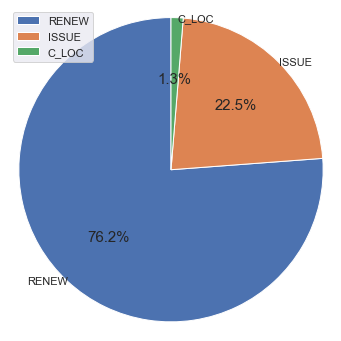

In [69]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = license_3_rate.head(3).index
data = license_3_rate['Count'].head(3)
plt.rcParams['font.size'] = 15

fig, ax = plt.subplots(figsize=(5, 5))
ax.pie(data, autopct='%1.1f%%', startangle=90, pctdistance=0.6, labels=labels, labeldistance=1)
plt.legend(labels, loc="best")
#draw the middle circle
# centre_circle = plt.Circle((0,0),0.4,color='black', fc='white',linewidth=0)
# fig = plt.gcf()
# fig.gca().add_artist(centre_circle)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.tight_layout()
# plt.savefig(f"Catagory Pie Chart.png")
plt.show()

In [32]:
license_3_3 = license_3['APPLICATION TYPE'].value_counts()
license_3_3

RENEW     753856
ISSUE     222901
C_LOC      12697
C_EXPA       713
C_CAPA       486
Name: APPLICATION TYPE, dtype: int64

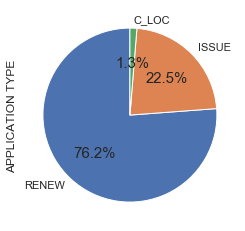

In [83]:
license_3_3.head(3).plot.pie( autopct='%1.1f%%',pctdistance=0.6,startangle=90)
# plt.pie(data, autopct='%1.1f%%', startangle=90, pctdistance=0.6);

#### 5. Map (Zip code)

In [121]:
# Filter the Zip Code only limitted to Chicago
license_5 =license_df.loc[license_df['CITY'] == 'CHICAGO']
license_5.head()

,ID,LICENSE ID,ACCOUNT NUMBER,SITE NUMBER,LEGAL NAME,DOING BUSINESS AS NAME,ADDRESS,CITY,STATE,ZIP CODE,...,LICENSE STATUS CHANGE DATE,SSA,LATITUDE,LONGITUDE,LOCATION,Community Areas,Historical Wards 2003-2015,Zip Codes,Census Tracts,Wards
0,101-20040516,1480073,1,1,BERGHOFF RESTAURANT COMPANY OF DELAWARE,BERGHOFF'S RESTAURANT,17 W ADAMS ST # 1ST,CHICAGO,IL,60603,...,NaN,1.0,41.879342,-87.628412,"{'latitude': '41.879341938770445', 'longitude'...",38.0,22.0,14912.0,92.0,36.0
1,101-20021116,1278029,1,1,BERGHOFF RESTAURANT COMPANY OF DELAWARE,BERGHOFF'S RESTAURANT,17 W ADAMS ST # 1ST,CHICAGO,IL,60603,...,NaN,1.0,41.879342,-87.628412,"{'latitude': '41.879341938770445', 'longitude'...",38.0,22.0,14912.0,92.0,36.0
2,101-20030516,1337924,1,1,BERGHOFF RESTAURANT COMPANY OF DELAWARE,BERGHOFF'S RESTAURANT,17 W ADAMS ST # 1ST,CHICAGO,IL,60603,...,NaN,1.0,41.879342,-87.628412,"{'latitude': '41.879341938770445', 'longitude'...",38.0,22.0,14912.0,92.0,36.0
3,100-20040516,1480076,1,1,BERGHOFF RESTAURANT COMPANY OF DELAWARE,BERGHOFF'S RESTAURANT,17 W ADAMS ST # 1ST,CHICAGO,IL,60603,...,NaN,1.0,41.879342,-87.628412,"{'latitude': '41.879341938770445', 'longitude'...",38.0,22.0,14912.0,92.0,36.0
4,101-20031116,1404362,1,1,BERGHOFF RESTAURANT COMPANY OF DELAWARE,BERGHOFF'S RESTAURANT,17 W ADAMS ST # 1ST,CHICAGO,IL,60603,...,NaN,1.0,41.879342,-87.628412,"{'latitude': '41.879341938770445', 'longitude'...",38.0,22.0,14912.0,92.0,36.0


In [122]:
license_5_1 = license_5['ZIP CODE'].value_counts()
license_5_1

60618      28391
60611      25854
60614      25488
60647      25361
60608      24797
           ...  
60131          1
60085.0        1
60014.0        1
60263          1
60471          1
Name: ZIP CODE, Length: 147, dtype: int64

In [123]:
# Access maps with API key
gmaps.configure(api_key=gkey)
license_5_df = pd.DataFrame(license_5_1)

In [124]:
license_5_df = license_5_df.reset_index()
license_5_df_1 = license_5_df.rename(columns={'index':'Zip Code', 'ZIP CODE':'Counts'})

In [125]:
license_5_df_1.head()

,Zip Code,Counts
0,60618,28391
1,60611,25854
2,60614,25488
3,60647,25361
4,60608,24797


In [104]:
# Customize the size of the figure
fig = gmaps.figure()

In [126]:
# Assign the marker layer to a variable
markers = gmaps.marker_layer(license_5_df_1)
# Add the layer to the map
fig.add_layer(markers)
fig

InvalidPointException: 60618.0 is not a valid latitude. Latitudes must lie between -90 and 90.

In [ ]:
Render a 2D map of Chicago with zip code boundaries.

from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import os
import os.path


us_shape_file_dir = "cb_2017_us_zcta510_500k"
os.chdir(us_shape_file_dir)

# Chicago coordinates.
lowerlon = -88.2 
upperlon = -87.2
lowerlat = 41.62
upperlat = 42.05


m = Basemap(
    llcrnrlon=lowerlon,
    llcrnrlat=lowerlat,
    urcrnrlon=upperlon,
    urcrnrlat=upperlat,
    resolution='c',
    projection='lcc',
    lat_0=lowerlat,
    lat_1=upperlat,
    lon_0=lowerlon,
    lon_1=upperlon
    )


shp_info = m.readshapefile(os.path.basename(us_shape_file_dir), 'state')
plt.gca().axis("off")
plt.show()

In [2]:
from mpl_toolkits.basemap import Basemap

KeyError: 'PROJ_LIB'

In [1]:
from pylab import rcParams

%matplotlib inline
rcParams['figure.figsize'] = (8,6)